# <center style="font-family: consolas; font-size: 32px; font-weight: bold;"> Eedi - Mining Misconceptions in Mathematics</center>
<p><center style="color:#949494; font-family: consolas; font-size: 20px;">Predict affinity between misconceptions and incorrect answers (distractors) in multiple-choice questions </center></p>


This is the 9th competition launched by [**The Learning Agency Lab**](https://www.kaggle.com/organizations/learningagencylab/competitions). This one seems to be quite interesting since it requires **Reasoning abilities** in the solutions.

# Overview

> In this competition, you’ll develop an **NLP model** driven by ML to accurately predict the **affinity between misconceptions and incorrect answers (distractors) in multiple-choice questions**. This solution will suugest candidate misconceptions for distractors, making it easier for expert **human teachers to tag distractors with misconceptions.**

**Our task** : 
* Create a model able to determine the **correct answer first from a Multiple Choice Question**
* Then it has to understand **what the other incorrect options are there for**. Usually for math MCQs, the other options are there to **confuse the answerer**, there could be some misconceptions that lead to an incorrect answer, which is often the case for math MCQs. You do the math wrong, yet you find your wrong answer available among the four options. The models task is to understand **what kind of misconception leads to the specific incorrect option**

Let's start with an example. 


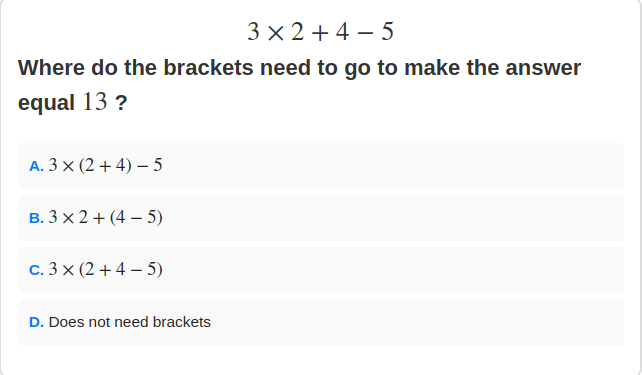

Here : 
The theory : **Use the order of operations to carry out calculations involving powers**
or **BIDMAS** Rule

For the options: 

* Option A is **correct(no distractor)**
* Option B is a **typical mistake, no misconceptions**
* Option C **typical mistake, no misconceptions**
* Option D incorrect, because of the misconception that someone can think, **here it would be -> 3x6-5 = 13**

# Diving into the dataset

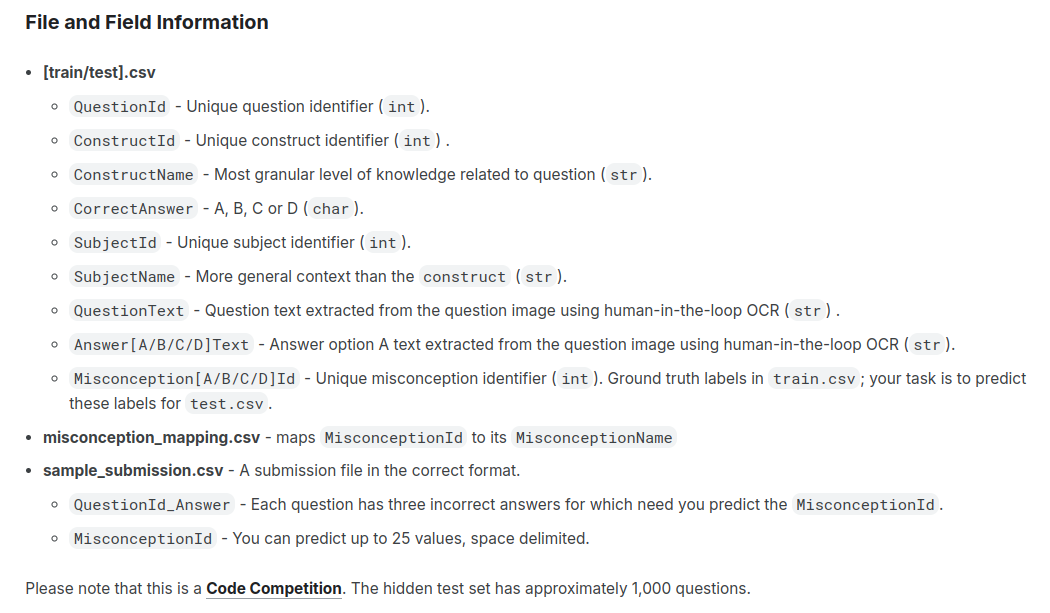

**Let's load the dataset first**

In [ ]:
import pandas as pd
train = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/train.csv")
test = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/test.csv")
mis_map = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv")
sub = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/sample_submission.csv")

Let's store the misconception maps as hashtables

In [ ]:
misTable = {}
for i in range(mis_map.shape[0]):
    misTable[mis_map.MisconceptionId.values[i]] = mis_map.MisconceptionName.values[i]

Let's first look at the train file

In [ ]:
train.head()

In [ ]:
train.columns

Let's look at a specific data point. We'll introduce a new function to visualize better. 


In [ ]:
!pip install -qq pylatexenc

In [ ]:
from IPython.display import display, HTML
from pylatexenc.latex2text import LatexNodes2Text

def map_misconception_id(value, misTable):
    # Check if value is NaN
    if pd.isna(value):
        return "No misconception/NaN"
    else:
        # Map the value to the misTable, if the value exists
        return misTable.get(int(value), "Unknown Misconception")

def generate_question_html(df, index,lat2text=1):
    global misTable
    # Fetch the question, options, and additional fields from the DataFrame
    question = df.iloc[index].QuestionText
    if lat2text==1:
        question = LatexNodes2Text().latex_to_text(question)
    options = []
    for i in ['A', 'B', 'C', 'D']:
        options.append(df['Answer' + i + 'Text'].iloc[index])
    
    # Fetch the correct answer and additional fields
    correct_answer = df.iloc[index].CorrectAnswer
    construct_name = df.iloc[index].ConstructName
    subject_name = df.iloc[index].SubjectName
    
    # Map misconception IDs with the hash table, considering NaN values
    misconception_a = map_misconception_id(df.iloc[index].MisconceptionAId, misTable)
    misconception_b = map_misconception_id(df.iloc[index].MisconceptionBId, misTable)
    misconception_c = map_misconception_id(df.iloc[index].MisconceptionCId, misTable)
    misconception_d = map_misconception_id(df.iloc[index].MisconceptionDId, misTable)

    # Start the HTML structure
    html = f"""
    <div style='font-family: Arial, sans-serif; border: 2px solid #007bff; padding: 15px; border-radius: 10px; width: 60%; margin: 0 auto; background-color: #f4f9ff;'>
        <p style='font-size: 16px; color: #007bff;'><strong>Construct Name:</strong> {construct_name}</p>
        <p style='font-size: 16px; color: #007bff;'><strong>Subject Name:</strong> {subject_name}</p>
        <hr style='border: 1px solid #007bff; margin: 10px 0;'>
        <p style='font-size: 18px; font-weight: bold; color: #ff6f61;'>Problem:</p>
        <p style='font-size: 20px; color: #333; font-weight: bold;'>{question}</p>
        <ul style='list-style-type: none; padding: 0;'>
    """
    
    # Option letters
    option_letters = ['A', 'B', 'C', 'D']
    
    # Add each option with the corresponding letter and styled nicely
    for i, option in enumerate(options):
        html += f"""
        <li style='background-color: #e0f2ff; padding: 10px; margin: 5px 0; border-radius: 5px;'>
            <span style='font-weight: bold; color: #007bff;'>{option_letters[i]}.</span> {option}
        </li>
        """
    
    # Close the list and add the correct answer at the bottom
    html += f"""
        </ul>
        <p style='font-size: 18px; font-weight: bold; color: #28a745;'>Correct answer: {correct_answer}</p>
        <hr style='border: 1px solid #007bff; margin: 20px 0;'>
        <p style='font-size: 16px; color: #333;'><strong>Misconception A:</strong> {misconception_a}</p>
        <p style='font-size: 16px; color: #333;'><strong>Misconception B:</strong> {misconception_b}</p>
        <p style='font-size: 16px; color: #333;'><strong>Misconception C:</strong> {misconception_c}</p>
        <p style='font-size: 16px; color: #333;'><strong>Misconception D:</strong> {misconception_d}</p>
    </div>
    """
    
    # Display the HTML
    display(HTML(html))



In [ ]:
index = 1
generate_question_html(train,index,lat2text=0)

In [ ]:
index = 2
generate_question_html(train,index)

In [ ]:
index = 5
generate_question_html(train,index)

**For the test sets**

In [ ]:
test.head()

> They don't have the ['MisconceptionAId','MisconceptionAId','MisconceptionAId',MisconceptionAId'] columns. These 4 are the target variables. We have to submit the ids for these columns. We can submit **upto 25 values for each column**

In [ ]:
sub.head()

# EDA

In [ ]:
train.columns

Let's check for null values first

In [ ]:
import pandas as pd
from IPython.display import display


def display_colorful_null_values_table(df):
    # Calculate the number of null values per column
    null_values = df.isna().sum().reset_index()
    null_values.columns = ['Column', 'Null Values']  # Rename columns
    
    # Define a function to highlight NaN values
    def highlight_nan(val):
        color = 'yellow' if val > 0 else ''
        return f'background-color: {color}'

    # Apply the styling to the 'Null Values' column to highlight NaN values
    styled_table = null_values.style.set_properties(**{
        'background-color': '#f4f9ff',
        'color': '#333',
        'border-color': '#007bff',
        'border-width': '1px',
        'border-style': 'solid',
        'text-align': 'center',
        'padding': '10px',
    }).set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#007bff'), ('color', 'white'), ('border-color', '#007bff'), ('border-width', '1px'), ('border-style', 'solid')]}
    ]).applymap(highlight_nan, subset=['Null Values'])
    
    # Display the styled table
    display(styled_table)


# Display colorful null values table
display_colorful_null_values_table(train)


Only the **4 MisconceptionId columns contain NaN values**. NaN values occur when there is no misconception, either it's a **correct answer, or a classic mistake, not the result of any misconception**

**Now let's dive into EDA. Let's see for the *'ConstructId'* first :**

In [ ]:
train['ConstructId'].value_counts()[:10]

**Now for 'CorrectAnswer'**

In [ ]:
import matplotlib.pyplot as plt

def plot_value_counts(df, column_name):
    # Get the value counts for the specified column
    value_counts = df[column_name].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='skyblue')

    # Add labels and title
    plt.title(f'Value Counts for {column_name}', fontsize=16)
    plt.xlabel('Values', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Show the plot
    plt.show()

In [ ]:
plot_value_counts(train, 'CorrectAnswer')

Similar distribuition for all of them. 

Now for the **MisconceptionIds**. Let's stack them together. 

In [ ]:
train['MisconceptionAId'].value_counts()

In [ ]:
train['MisconceptionBId'].value_counts()

In [ ]:
train['MisconceptionCId'].value_counts()

In [ ]:
train['MisconceptionDId'].value_counts()

In [ ]:
stacked = []
for i in ['MisconceptionAId','MisconceptionBId','MisconceptionCId','MisconceptionDId']:
    stacked.extend(train[train[i].notna()][i].tolist())

    from collections import Counter

def sort_by_frequency_with_counts(input_list):
    freq_count = Counter(input_list)
    sorted_elements_with_counts = sorted(freq_count.items(), key=lambda x: (-x[1], x[0]))
    
    return sorted_elements_with_counts

sorted_elements_with_counts = sort_by_frequency_with_counts(stacked)

# Print the sorted elements along with their frequencies
print("Most frequent MisconceptionIds accross the Options : ")
print("-"*100,'\n')
for element, count in sorted_elements_with_counts[:10]:
    print("Misconception : ",misTable[int(element)])
    print("MisconceptionId : ",int(element))
    print("MisconceptionId count : ",count)
    print("-"*100,'\n')


That's it for today. I'll try to add things continuously.

**Good luck to all!**